In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
D=pd.read_json('out.20241115/df.json')
# D['req_solutions'] = 1
# # D=pd.read_json('out/df.json')

# D1=pd.read_json('out.10-solutions-12-workers/df.json')
# D1['req_solutions'] = 10
# # D = D1 # pd.concat([D, D1])

# # D1=pd.read_json('out.100-solutions-release-nointrospection-workerdependent-parallel-attempts/df.json')
# # D1['req_solutions'] = 100
# # D = pd.concat([D, D1])

# # D1=pd.read_json('out.10-solutions-release-nointrospection-workerdependent-parallel-attempts/df.json')
# # D1['req_solutions'] = 10
# D = pd.concat([D, D1], ignore_index=True)

D.to_json('df.json', orient='records')

D['workers'] = D['workers'].replace(0, 12)
# drop all where solutions < required solutions
D = D[D['solutions'] >= D['required solutions']]

# D = D[D['workers'] < 8]
# D = D[D['workers'] != 1]

D['workers'] = D['workers'].astype('category')
D['workers'] = D['workers'].cat.reorder_categories(sorted(D['workers'].cat.categories), ordered=True)
D['workers'] = D['workers'].cat.rename_categories({-1: 'seq'})


D['time(s)-per-solution'] = D['time(s)'] / D['solutions']

D

,workers,required solutions,time,solutions,best cost,time(s),time(s)-per-solution
0,2,10,140940.0,10,48.5772,140.9400,14.094000
1,4,10,44067.4,10,46.3713,44.0674,4.406740
2,1,100,855691.0,100,47.0524,855.6910,8.556910
3,6,1,17298.9,2,45.4402,17.2989,8.649450
4,7,10,58159.8,11,51.1206,58.1598,5.287255
...,...,...,...,...,...,...,...
76,3,100,319421.0,100,45.4403,319.4210,3.194210
77,6,100,165940.0,100,45.4403,165.9400,1.659400
78,4,100,326666.0,100,44.8705,326.6660,3.266660
79,5,1,18857.0,1,51.5516,18.8570,18.857000


In [73]:
palette = sns.color_palette("colorblind", 3)

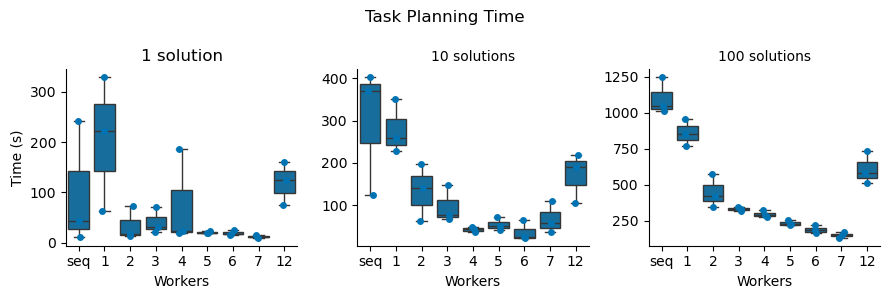

In [74]:
#sns.FacetGrid(D, col='req_solutions', sharey=False).map(sns.violinplot, 'workers', 'time(s)', density_norm='width', inner='points').set_axis_labels('Workers', 'Time (s)')
(
sns.FacetGrid(D, col='required solutions', sharey=False)
.map(sns.stripplot, 'workers', 'time(s)', color=palette[0], order=D['workers'].cat.categories)
.map(sns.boxplot, 'workers', 'time(s)', showfliers=True, color=palette[0], order=D['workers'].cat.categories)
.set_axis_labels('Workers', 'Time (s)')
.set_titles('{col_name} solutions')
)
plt.suptitle('Task Planning Time')

# set title of first on to "1 solution" (no s)
plt.gcf().axes[0].set_title('1 solution')

plt.tight_layout()
plt.show()

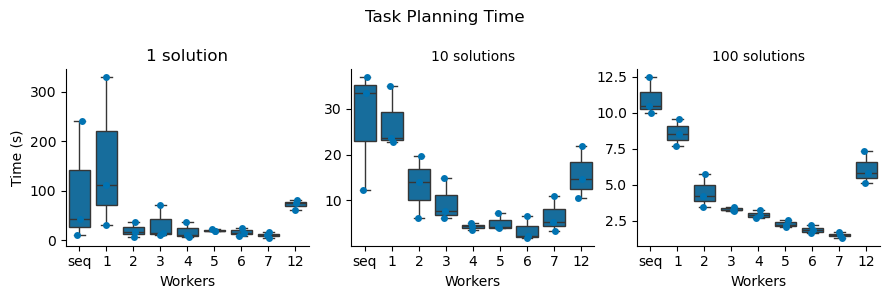

In [78]:
#sns.FacetGrid(D, col='req_solutions', sharey=False).map(sns.violinplot, 'workers', 'time(s)', density_norm='width', inner='points').set_axis_labels('Workers', 'Time (s)')
(
sns.FacetGrid(D, col='required solutions', sharey=False)
.map(sns.stripplot, 'workers', 'time(s)-per-solution', color=palette[0], order=D['workers'].cat.categories)
.map(sns.boxplot, 'workers', 'time(s)-per-solution', showfliers=False, color=palette[0], order=D['workers'].cat.categories)
.set_axis_labels('Workers', 'Time (s)')
.set_titles('{col_name} solutions')
)
plt.suptitle('Task Planning Time')

# set title of first on to "1 solution" (no s)
plt.gcf().axes[0].set_title('1 solution')

plt.tight_layout()
plt.show()

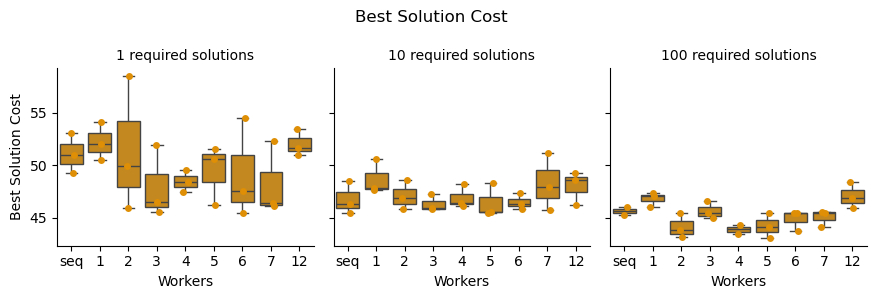

In [ ]:
(
sns.FacetGrid(D, col='required solutions', sharey=True)
.map(sns.stripplot, 'workers', 'best cost', color=palette[1], order= D['workers'].cat.categories)
.map(sns.boxplot, 'workers', 'best cost', showfliers=False, color=palette[1], order= D['workers'].cat.categories)
.set_axis_labels('Workers', 'Best Solution Cost')
.set_titles('{col_name} required solutions')
)
plt.suptitle('Best Solution Cost')
plt.tight_layout()
#sns.FacetGrid(D, col='req_solutions', sharey=False).map(sns.stripplot, 'workers', 'best cost')
#sns.FacetGrid(D, col='req_solutions', sharey=False).map(sns.violinplot, 'workers', 'best cost', density_norm='width', inner='points').set_axis_labels('Workers', 'Best cost')
plt.show()